<a href="https://colab.research.google.com/github/julianVelandia/Curso-Como-crear-tu-propio-modelo-de-lenguaje-LLM/blob/master/1_5Ejemplo_Tokenizaci%C3%B3n_y_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenización básica (espacios y signos)
La tokenización divide el texto en unidades llamadas *tokens*. La forma más sencilla es separando por espacios y signos de puntuación.

In [ ]:
texto = "Estoy aprendiendo en EDteam porque en español nadie explica mejor"
palabras = texto.split()
print(palabras)

['Estoy', 'aprendiendo', 'en', 'EDteam', 'porque', 'en', 'español', 'nadie', 'explica', 'mejor']


## Byte‑Pair Encoding (BPE)

Aprende pares de caracteres frecuentes y los fusiona iterativamente para formar sub‑tokens.

In [ ]:
from collections import Counter
import re

def get_stats(corpus):
    '''Cuenta la frecuencia de cada par de símbolos consecutivos en el corpus'''
    pairs = Counter()
    for word in corpus:
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pair = (symbols[i], symbols[i + 1])
            pairs[pair] += 1
    #print(pairs)
    return pairs

def merge_vocab(pair, corpus):
    '''Fusiona el par más frecuente en todo el corpus'''
    texto_a_buscar = ' '.join(pair)
    texto_reemplazo = ''.join(pair)
    nuevo_corpus = []
    for palabra in corpus:
        nueva_palabra = palabra.replace(texto_a_buscar, texto_reemplazo)
        nuevo_corpus.append(nueva_palabra)
    return nuevo_corpus

def run_bpe_example(iteraciones):
    text = "caminando ando cantando y cantando ando caminando"
    corpus = [' '.join(word) + ' </w>' for word in text.split()]

    print(f"--- Iteración 0 ---")
    print('\n'.join(corpus), '\n')

    for i in range(iteraciones):
        print(f"--- Iteración {i+1} ---")
        pairs = get_stats(corpus)
        if not pairs: break
        most_frequent = pairs.most_common(1)[0][0]
        print(f"Par más frecuente: {most_frequent} ({pairs[most_frequent]} veces)")
        corpus = merge_vocab(most_frequent, corpus)
        print('\n'.join(corpus), '\n')

    tokens = ' '.join(corpus).split()
    frecuencias = Counter(tokens)
    print("Frecuencias de cada token:")
    for token, freq in frecuencias.items():
        print(f"{token}: {freq}")
    return tokens


tokens = run_bpe_example(11)


--- Iteración 0 ---
c a m i n a n d o </w>
a n d o </w>
c a n t a n d o </w>
y </w>
c a n t a n d o </w>
a n d o </w>
c a m i n a n d o </w> 

--- Iteración 1 ---
Par más frecuente: ('a', 'n') (8 veces)
c a m i n an d o </w>
an d o </w>
c an t an d o </w>
y </w>
c an t an d o </w>
an d o </w>
c a m i n an d o </w> 

--- Iteración 2 ---
Par más frecuente: ('an', 'd') (6 veces)
c a m i n and o </w>
and o </w>
c an t and o </w>
y </w>
c an t and o </w>
and o </w>
c a m i n and o </w> 

--- Iteración 3 ---
Par más frecuente: ('and', 'o') (6 veces)
c a m i n ando </w>
ando </w>
c an t ando </w>
y </w>
c an t ando </w>
ando </w>
c a m i n ando </w> 

--- Iteración 4 ---
Par más frecuente: ('ando', '</w>') (6 veces)
c a m i n ando</w>
ando</w>
c an t ando</w>
y </w>
c an t ando</w>
ando</w>
c a m i n ando</w> 

--- Iteración 5 ---
Par más frecuente: ('c', 'a') (2 veces)
ca m i n ando</w>
ando</w>
can t ando</w>
y </w>
can t ando</w>
ando</w>
ca m i n ando</w> 

--- Iteración 6 ---
Par más fre

# Codificación numérica (IDs)

In [ ]:
def encode_tokens(tokens):
    vocab = {token: idx for idx, token in enumerate(sorted(set(tokens)))}
    encoded = [vocab[token] for token in tokens]
    return vocab, encoded


vocab, encoded = encode_tokens(tokens)
print(vocab)
print(encoded)


{'</w>': 0, 'ando</w>': 1, 'caminando</w>': 2, 'cantando</w>': 3, 'y': 4}
[2, 1, 3, 4, 0, 3, 1, 2]


# Embeddings

Vectores semánticos

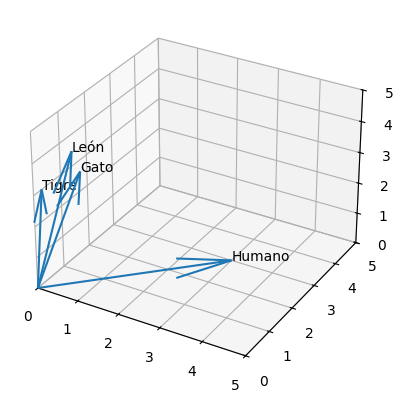

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

v_tigre = np.array([0, 0.3, 3])
v_gato = np.array([0.5, 1, 3.3])
v_leon = np.array([0.1, 1.3, 3.6])
v_humano = np.array([3,3,0])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, v_tigre[0], v_tigre[1], v_tigre[2], length=1, normalize=False)
ax.text(v_tigre[0], v_tigre[1], v_tigre[2], 'Tigre')
ax.quiver(0, 0, 0, v_gato[0], v_gato[1], v_gato[2], length=1, normalize=False)
ax.text(v_gato[0], v_gato[1], v_gato[2], 'Gato')
ax.quiver(0, 0, 0, v_leon[0], v_leon[1], v_leon[2], length=1, normalize=False)
ax.text(v_leon[0], v_leon[1], v_leon[2], 'León')
ax.quiver(0, 0, 0, v_humano[0], v_humano[1], v_humano[2], length=1, normalize=False)
ax.text(v_humano[0], v_humano[1], v_humano[2], 'Humano')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])


plt.show()


Matríz de Embedding

In [ ]:
import numpy as np

def inicializar():
    vocab = list(tokens)
    vocab_size = len(vocab)
    embedding_dim = 8

    token_to_index = {token: idx for idx, token in enumerate(vocab)}
    embeddings = np.random.randn(vocab_size, embedding_dim)
    return vocab, token_to_index, embeddings

def get_embedding(token, token_to_index, embeddings):
    idx = token_to_index.get(token, None)
    if idx is None:
        raise ValueError(f"Token '{token}' no encontrado en el vocabulario")
    return embeddings[idx]

def main():
    vocab, token_to_index, embeddings = inicializar()

    print(vocab)
    print(embeddings)
    print('Embedding ando</w>: ', get_embedding('ando</w>', token_to_index, embeddings))

main()


['caminando</w>', 'ando</w>', 'cantando</w>', 'y', '</w>', 'cantando</w>', 'ando</w>', 'caminando</w>']
[[-0.8668065   0.63934339 -0.46137434 -0.56776657  1.90298402 -0.55169568
  -1.34538367 -0.15546294]
 [ 1.17304379  1.18137089 -1.17457004 -0.88067415 -1.02584072  0.59229393
  -1.32389045 -1.58148283]
 [-1.69200137  0.45805517 -0.29310744  0.54435437 -0.97335001 -0.40165887
  -0.01985544  0.06386646]
 [ 0.70095347  0.01448065 -0.68809778  0.5580403  -0.46240315 -0.1773788
  -2.57486639  1.13861134]
 [-0.77063499 -0.3586169   0.02032959  0.99951846  0.12639468  0.62978632
   0.97687453 -0.29409757]
 [-1.25012639 -0.73803451  0.72278941  0.64681097 -1.49949715  0.37398255
   0.02270092  0.37015308]
 [ 1.3990046  -0.31444004  0.20980274 -0.48684976  0.30286677 -0.19963682
   0.90479848  0.18194202]
 [-0.78446156  1.3848475  -0.73371456 -1.01492332  0.64234776  0.56954985
  -0.85432701  1.90984494]]
Embedding ando</w>:  [ 1.3990046  -0.31444004  0.20980274 -0.48684976  0.30286677 -0.199